<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


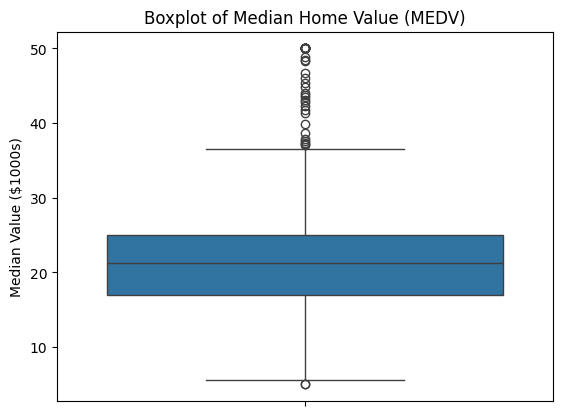

In [5]:
sns.boxplot(y=boston_df["MEDV"])
pyplot.title("Boxplot of Median Home Value")
pyplot.ylabel("Median Value ($1000s)")
pyplot.show()


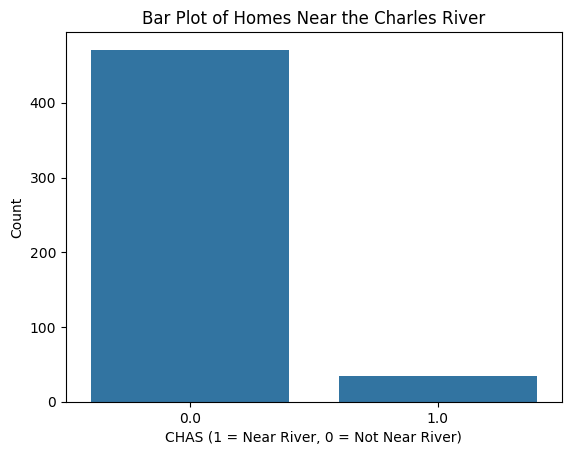

In [6]:
sns.countplot(x=boston_df["CHAS"])
pyplot.title("Bar Plot of Homes Near the Charles River")
pyplot.xlabel("CHAS (1 = Near River, 0 = Not Near River)")
pyplot.ylabel("Count")
pyplot.show()


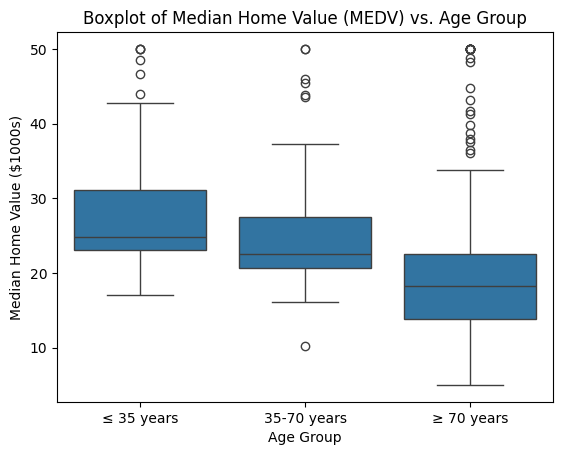

In [7]:
bins = [0, 35, 70, 100]
labels = ["≤ 35 years", "35-70 years", "≥ 70 years"]
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels)

sns.boxplot(x="AGE_Group", y="MEDV", data=boston_df)
pyplot.title("Boxplot of Median Home Value (MEDV) vs. Age Group")
pyplot.xlabel("Age Group")
pyplot.ylabel("Median Home Value ($1000s)")
pyplot.show()


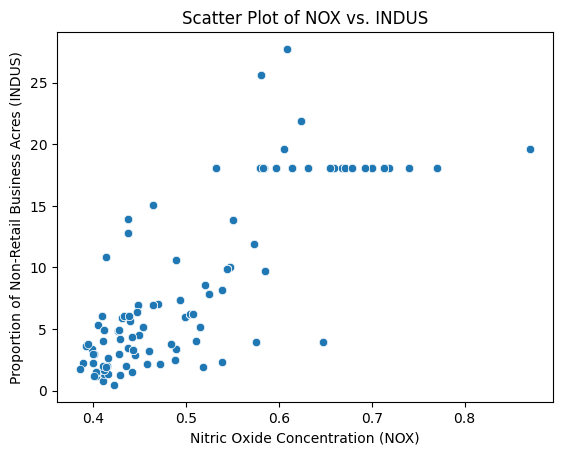

In [8]:
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"])
pyplot.title("Scatter Plot of NOX vs. INDUS")
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.show()


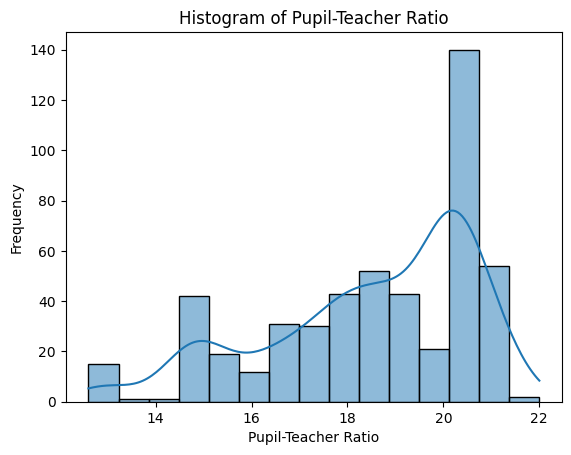

In [9]:
sns.histplot(boston_df["PTRATIO"], bins=15, kde=True)
pyplot.title("Histogram of Pupil-Teacher Ratio")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()


In [10]:
from scipy.stats import ttest_ind

medv_river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_no_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]

t_stat, p_value = ttest_ind(medv_river, medv_no_river, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in home values near the Charles River.")
else:
    print("Fail to reject the null hypothesis: No significant difference in home values near the Charles River.")


T-statistic: 3.1133
P-value: 0.0036
Reject the null hypothesis: There is a significant difference in home values near the Charles River.


In [13]:
model = ols("MEDV ~ C(AGE_Group)", data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
p_value = anova_table["PR(>F)"].iloc[0]
if p_value < 0.05:
    print("Reject the null hypothesis: Median home values differ significantly based on the age of the houses.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values across different age groups.")


                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject the null hypothesis: Median home values differ significantly based on the age of the houses.


In [16]:
from scipy.stats import pearsonr
corr_coeff, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between NOX and INDUS.")


Pearson Correlation Coefficient: 0.7637
P-value: 0.0000
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


In [19]:
X = boston_df["DIS"]  
y = boston_df["MEDV"] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        10:03:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""